In [130]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [131]:
print("Hello World")

Hello World


In [132]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")  # Ignore all warnings

In [133]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [134]:
import pandas as pd

data = pd.read_csv("data/train.csv")

remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port']
data = data.drop(columns=remove_col)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()
data.head()

,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_FIN_flags,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,0.000090,11125.474801,NaN,22250.949602,1.00,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN,Background
1,0.000033,30174.848921,30174.848921,60349.697842,1.00,NaN,1.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN,Background
2,61.977190,0.322699,0.242025,0.564724,0.75,2.0,2.0,0.0,NaN,6.0,...,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0,Background
3,0.024249,NaN,82.478178,164.956355,1.00,0.0,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0,Benign
4,0.027580,NaN,NaN,72.516256,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0,Benign


In [135]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 416473


,Missing Values,Proportion (%)
flow_duration,117064,28.108425
forward_packets_per_sec,123392,29.627851
backward_packets_per_sec,92239,22.147654
flow_packets_per_sec,111750,26.832472
down_up_ratio,123615,29.681396
flow_FIN_flags,112049,26.904265
flow_SYN_flags,91010,21.852557
flow_RST_flags,105436,25.316407
forward_PSH_flags,116525,27.979005
backward_PSH_flags,63554,15.260053


In [136]:
def calculate_missing_values_by_category(data, category_column):
    grouped = data.groupby(category_column)
    results = []
    
    for category, group in grouped:
        miss = group.isna().sum()
        miss_proportion = (miss / len(group)) * 100
        
        category_df = pd.DataFrame({
            'Category': category,
            'Column Name': miss.index,
            'Missing Values': miss.values,
            'Proportion (%)': miss_proportion.values
        })
        
        results.append(category_df)

    output = pd.concat(results).reset_index(drop=True)
    return output

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

# Example usage
category_column = 'traffic'
miss_data_by_category = calculate_missing_values_by_category(data, category_column)
styled_miss_data_by_category = miss_data_by_category.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

print("Number of observations: {}".format(len(data)))
styled_miss_data_by_category

Number of observations: 416473


,Category,Column Name,Missing Values,Proportion (%)
0,Background,flow_duration,16955,13.285952
1,Background,forward_packets_per_sec,19272,15.101555
2,Background,backward_packets_per_sec,34133,26.746646
3,Background,flow_packets_per_sec,40697,31.890202
4,Background,down_up_ratio,20558,16.109265
5,Background,flow_FIN_flags,34374,26.935494
6,Background,flow_SYN_flags,41541,32.551561
7,Background,flow_RST_flags,16213,12.704520
8,Background,forward_PSH_flags,47418,37.156783
9,Background,backward_PSH_flags,28860,22.614719


<Axes: >

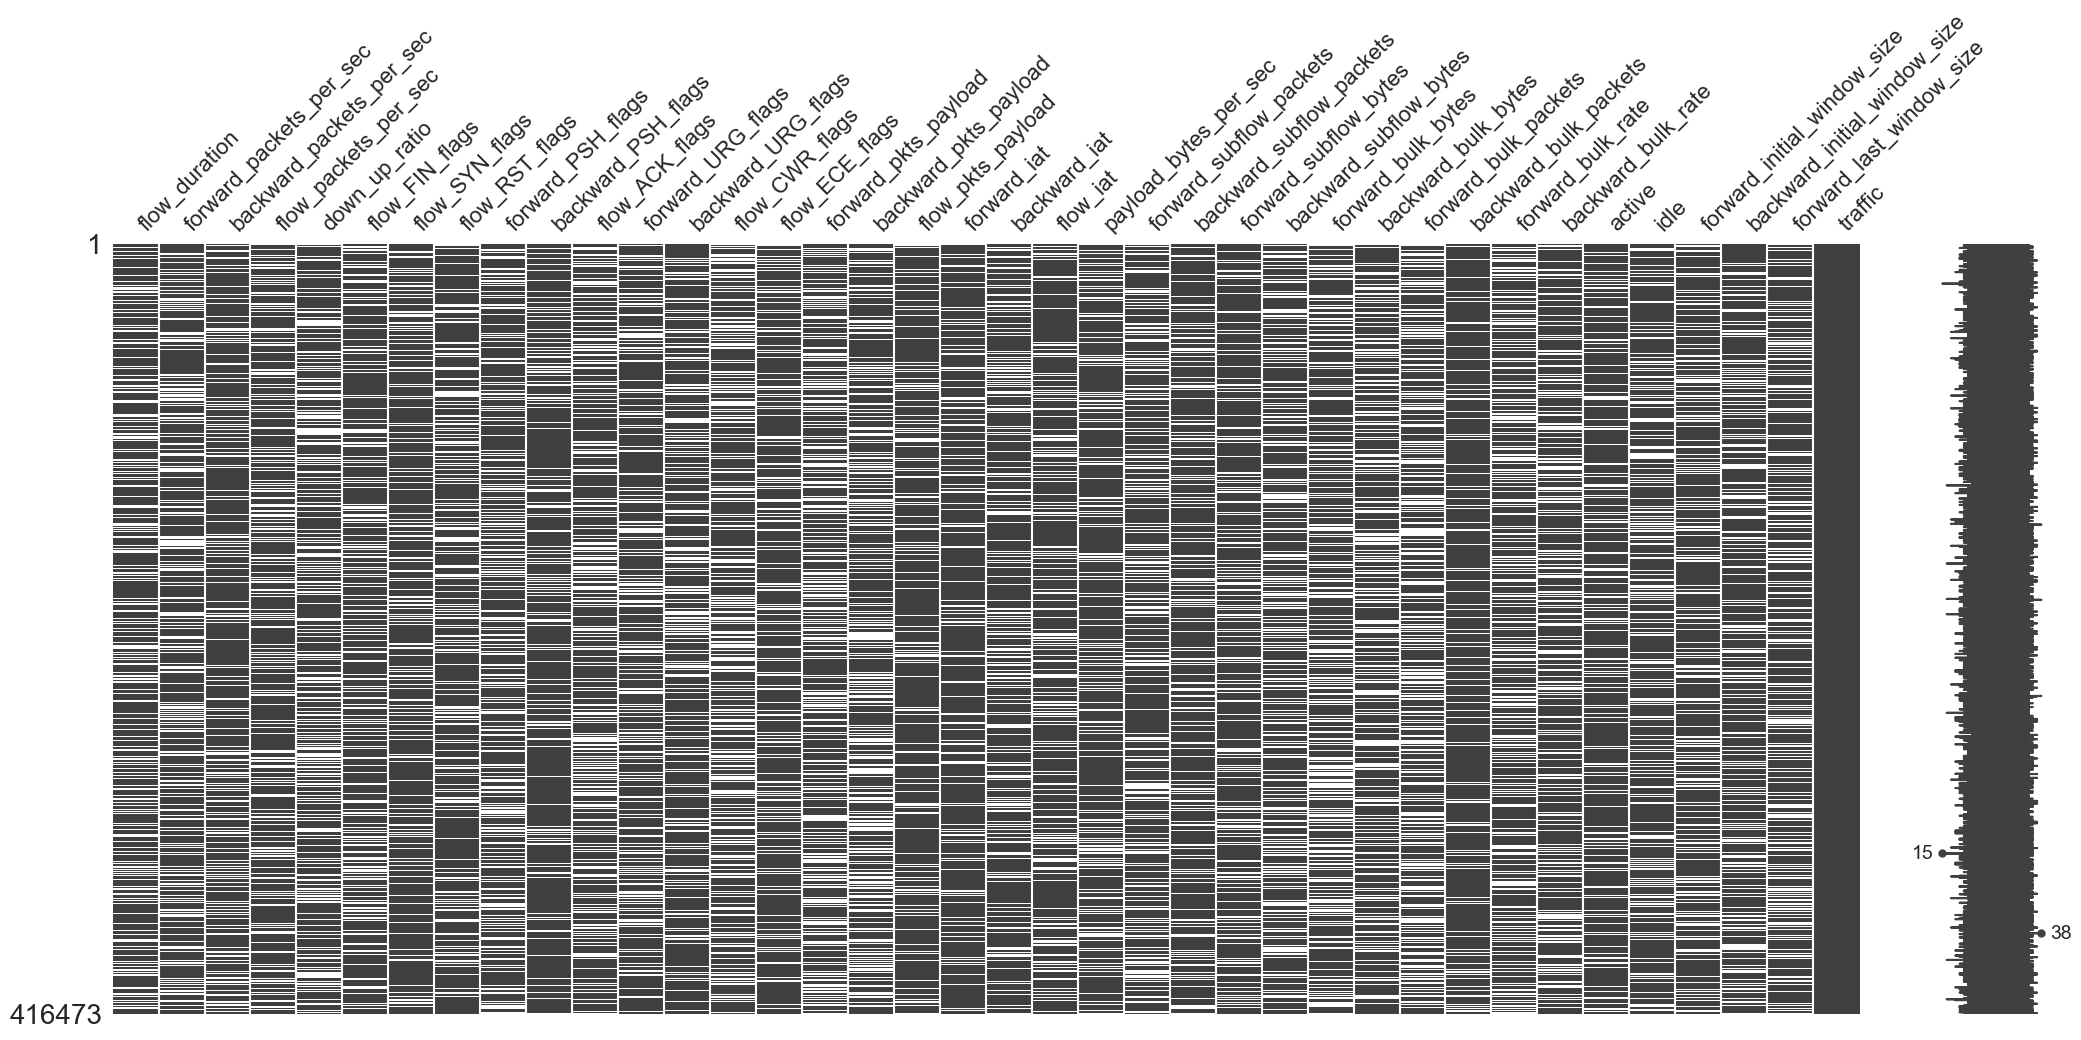

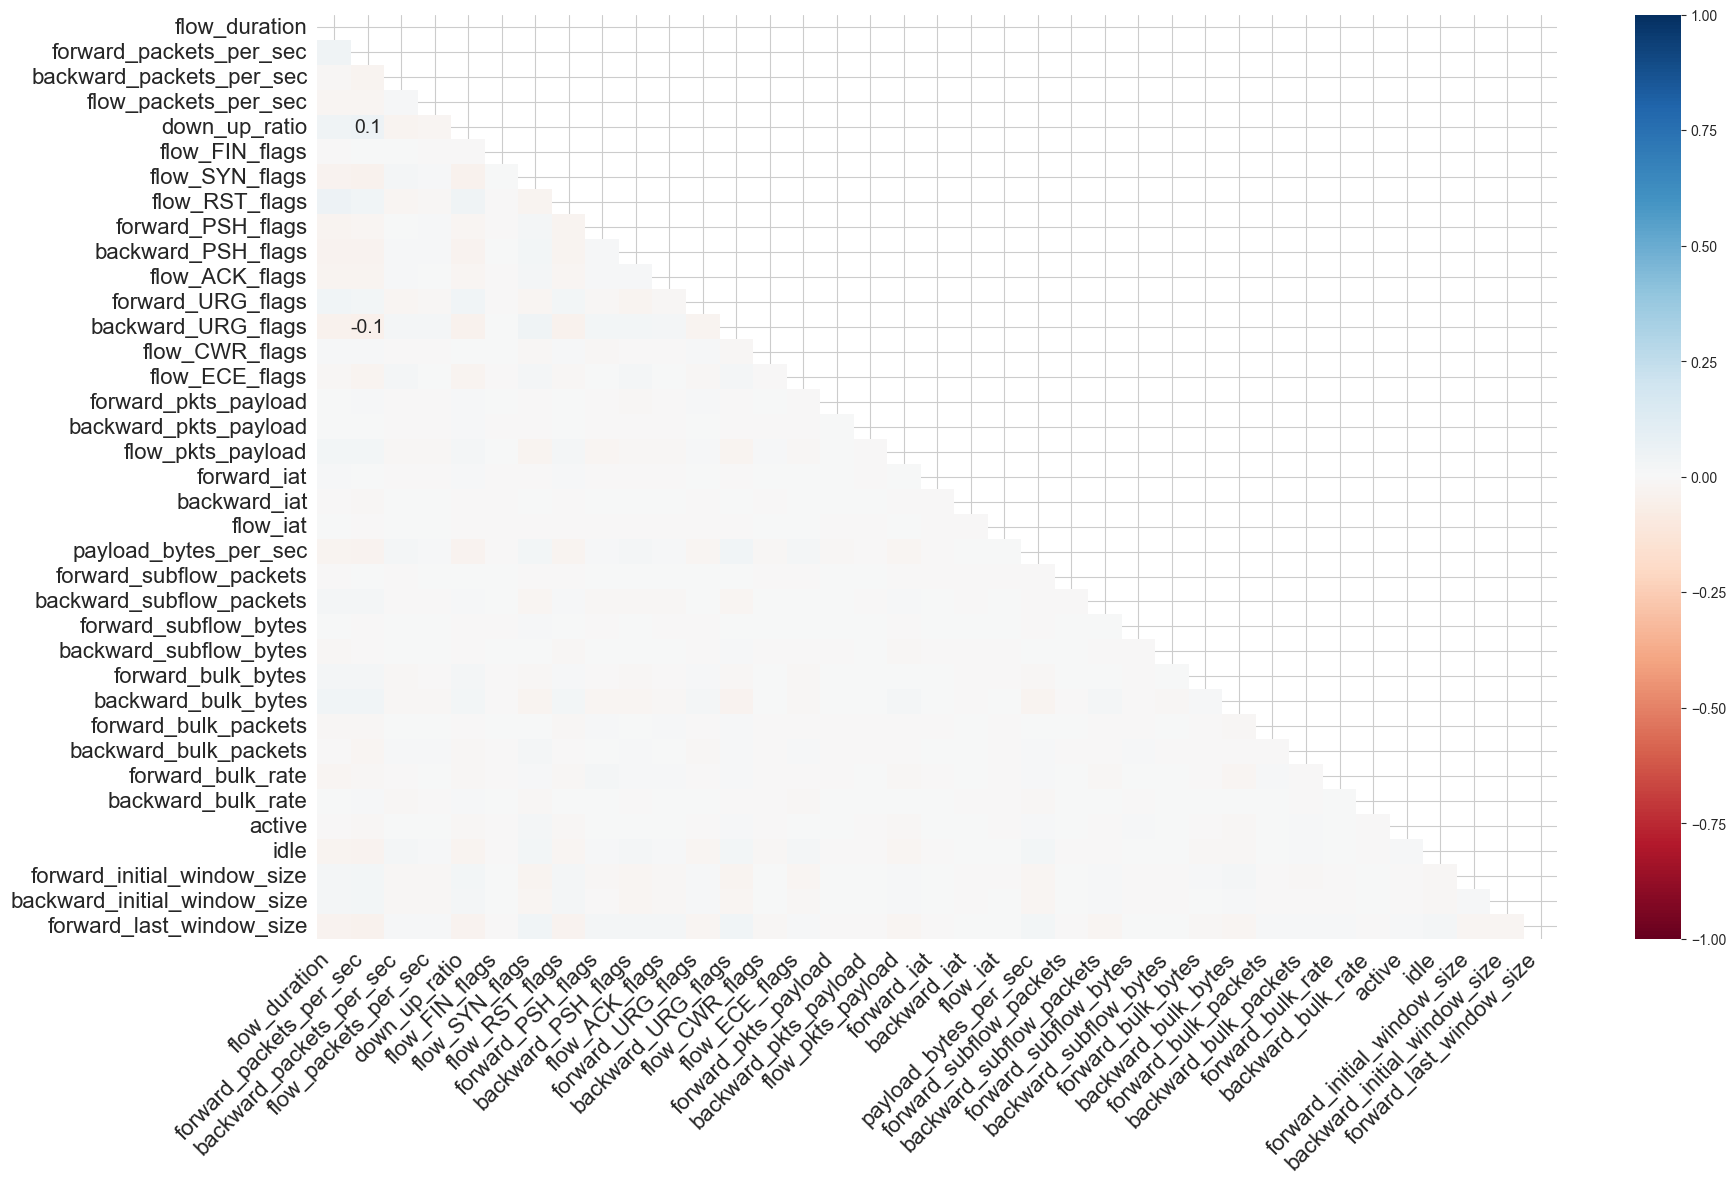

In [137]:
import missingno as msno

msno.matrix(data)
msno.heatmap(data)

In [138]:
def fill_packets(row):
    # Fill flow_packets_per_sec
    if pd.isna(row['flow_packets_per_sec']):
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    
    # Fill forward_packets_per_sec and backward_packets_per_sec
    if pd.isna(row['forward_packets_per_sec']) and not pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['backward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']):
        row['backward_packets_per_sec'] = row['forward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['forward_packets_per_sec']) and pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
        row['backward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
    
    # Fill down_up_ratio
    if not pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']) and row['forward_packets_per_sec'] != 0:
        row['down_up_ratio'] = row['backward_packets_per_sec'] / row['forward_packets_per_sec']
    
    # Fill flow_pkts_payload
    if pd.isna(row['flow_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']) and not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = (row['forward_pkts_payload'] + row['backward_pkts_payload']) / 2
        elif not pd.isna(row['forward_pkts_payload']):
            row['flow_pkts_payload'] = row['forward_pkts_payload']
        elif not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = row['backward_pkts_payload']
    
    # Fill forward_pkts_payload and backward_pkts_payload
    if pd.isna(row['forward_pkts_payload']) and pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['flow_pkts_payload']):
            row['forward_pkts_payload'] = row['flow_pkts_payload']
            row['backward_pkts_payload'] = row['flow_pkts_payload']
    elif pd.isna(row['forward_pkts_payload']):
        if not pd.isna(row['backward_pkts_payload']):
            row['forward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['backward_pkts_payload']
    elif pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']):
            row['backward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['forward_pkts_payload']
    
    return row

data = data.apply(fill_packets, axis=1)

In [139]:
miss_data = calculate_missing_values(data)
miss_data

,Missing Values,Proportion (%)
flow_duration,117064,28.108425
forward_packets_per_sec,6622,1.590019
backward_packets_per_sec,6622,1.590019
flow_packets_per_sec,6622,1.590019
down_up_ratio,15312,3.676589
flow_FIN_flags,112049,26.904265
flow_SYN_flags,91010,21.852557
flow_RST_flags,105436,25.316407
forward_PSH_flags,116525,27.979005
backward_PSH_flags,63554,15.260053


In [140]:
features_to_drop = miss_data[miss_data["Proportion (%)"] > 20].index
data_cleaned = data.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)

Dropped features: Index(['flow_duration', 'flow_FIN_flags', 'flow_SYN_flags', 'flow_RST_flags',
       'forward_PSH_flags', 'flow_ACK_flags', 'forward_URG_flags',
       'backward_URG_flags', 'flow_CWR_flags', 'backward_iat', 'flow_iat',
       'payload_bytes_per_sec', 'forward_subflow_packets',
       'backward_subflow_packets', 'backward_subflow_bytes',
       'forward_bulk_bytes', 'backward_bulk_bytes', 'forward_bulk_packets',
       'forward_bulk_rate', 'backward_bulk_rate', 'idle',
       'forward_initial_window_size', 'backward_initial_window_size',
       'forward_last_window_size'],
      dtype='object')


In [141]:
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer

remove_col = ['traffic']
traffic_col = data['traffic'].copy()
data = data.drop(columns=remove_col)

# imputer = IterativeImputer(max_iter=10, random_state=42)
imputer = SimpleImputer(strategy='mean')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data['traffic'] = traffic_col.values
data = data.reset_index(drop=True)
data.to_csv("data/processing/data_fill.csv", index=False)

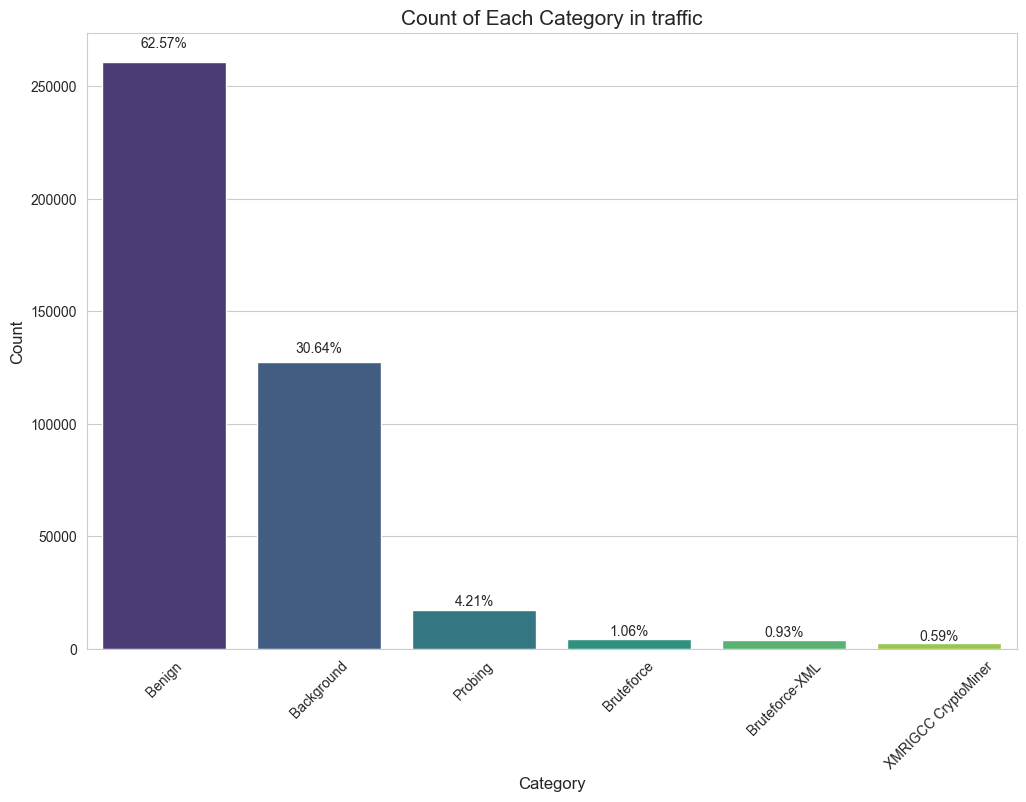

In [142]:
import matplotlib.pyplot as plt

def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [143]:
def remove_duplicates(df, subset=None, keep='first'):
    duplicate_count = df.duplicated(subset=subset, keep=keep).sum()
    print(f"Number of Duplicated: {duplicate_count}")
    df_cleaned = df.drop_duplicates(subset=subset, keep=keep)
    
    return df_cleaned

data = remove_duplicates(data)

Number of Duplicated: 24


In [144]:
def mean_by_traffic(data, output_file):
    mean_by_traffic_numerical = data.groupby('traffic')[numerical_columns].mean().round(2)
    mean_by_traffic_numerical.to_csv(output_file, index=True)
    print(mean_by_traffic_numerical)
    print(f"Mean values by traffic category have been saved to '{output_file}'.")

mean_by_traffic(data, 'data/processing/mean_by_traffic_numerical.csv')

                     flow_duration  forward_packets_per_sec   
traffic                                                       
Background                   12.42                  3176.22  \
Benign                        8.72                  1179.47   
Bruteforce                    8.24                    34.89   
Bruteforce-XML                9.87                    49.26   
Probing                       4.71                    72.23   
XMRIGCC CryptoMiner           4.17                    23.74   

                     backward_packets_per_sec  flow_packets_per_sec   
traffic                                                               
Background                            3150.37               6326.58  \
Benign                                1150.43               2329.90   
Bruteforce                              34.42                 69.31   
Bruteforce-XML                          48.47                 97.73   
Probing                                 76.74                148.97  

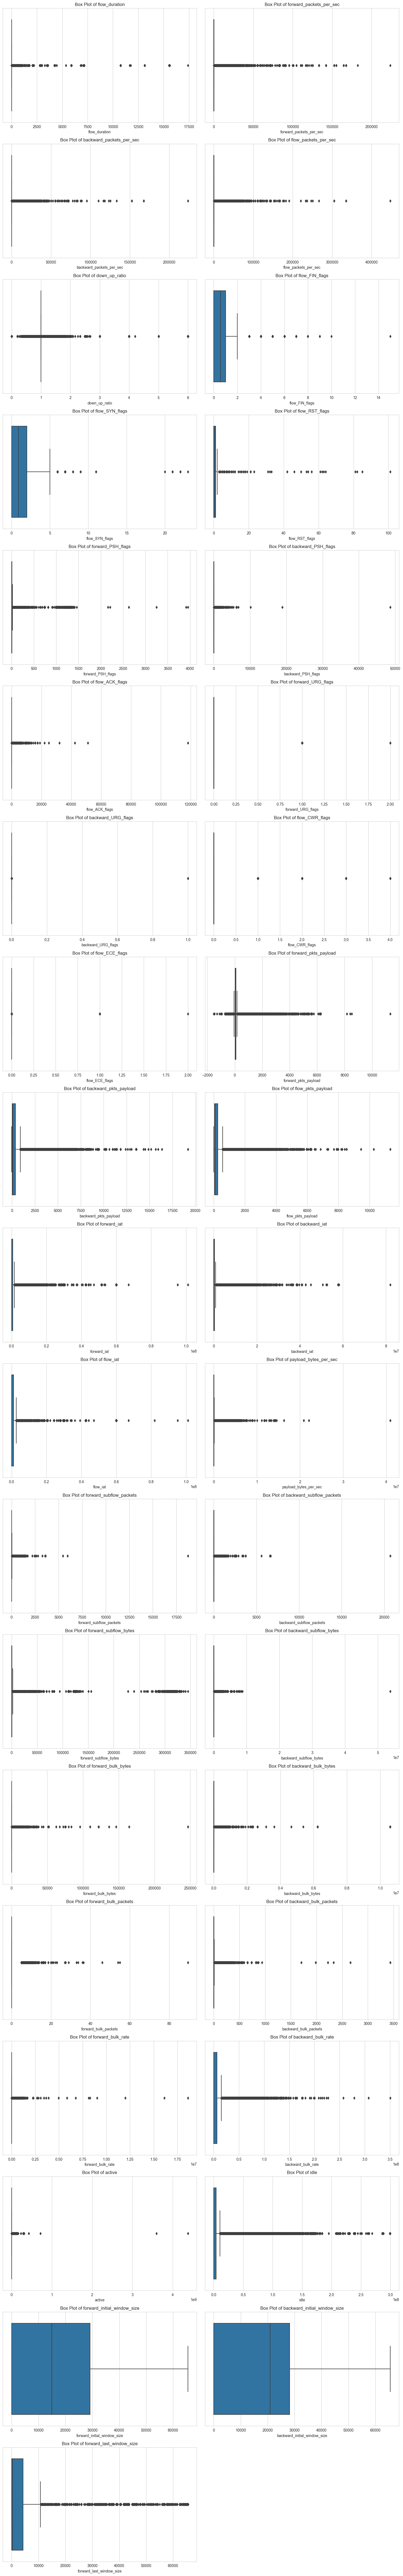

In [145]:
def plot_boxplots(data):
    num_cols=2
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

For big data problems, outliers are generally not a problem in fitting the regression to
be used in predicting new data. However, outliers are central to anomaly detection,
where finding outliers is the whole point. The outlier could also correspond to a case
of fraud or an accidental action. In any case, detecting outliers can be a critical busi‐
ness need.

In [146]:
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, MinMaxScaler

def robust_scale_numeric(df):
    scaler = RobustScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

data = robust_scale_numeric(data)


In [147]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['traffic'], axis=1)  # Features 
y = data['traffic']                        # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train data: {} \nNumber of test data: {}".format(len(X_train), len(y_test)))

Number of train data: 333159 
Number of test data: 83290


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

print("Class Distribution before SMOTEENN:", Counter(y_train))
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)
print("Class Distribution after SMOTEENN:", Counter(y_train))

Class Distribution before SMOTEENN: Counter({'Benign': 208448, 'Background': 102089, 'Probing': 14072, 'Bruteforce': 3506, 'Bruteforce-XML': 3070, 'XMRIGCC CryptoMiner': 1974})


In [80]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees', "Naive Bayes", "XGBoost"]
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42),
              ComplementNB(),
              xgb.XGBClassifier()]

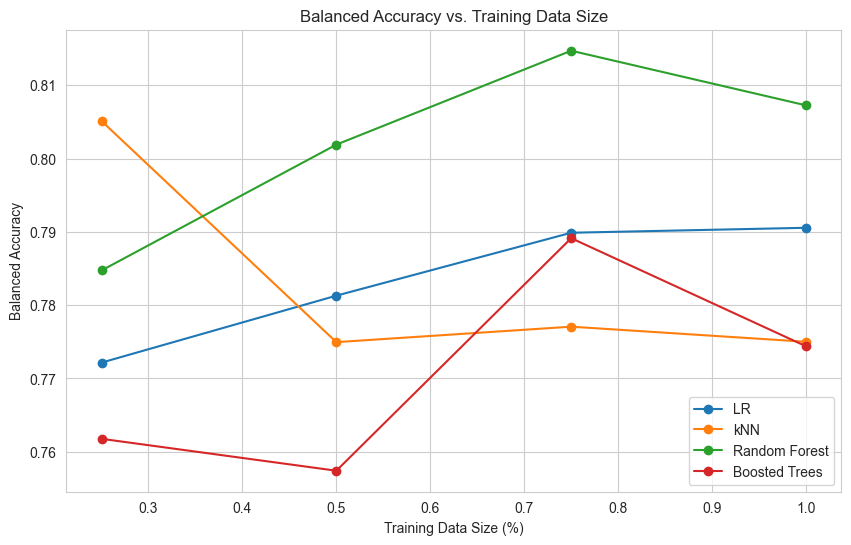

Optimal Balanced Accuracy for LR: 0.7905 with 100% of the training data.
Optimal Balanced Accuracy for kNN: 0.8051 with 25% of the training data.
Optimal Balanced Accuracy for Random Forest: 0.8147 with 75% of the training data.
Optimal Balanced Accuracy for Boosted Trees: 0.7891 with 75% of the training data.


In [81]:
from sklearn.metrics import balanced_accuracy_score

train_sizes = [0.25, 0.50, 0.75, 1.00]
balanced_accuracies = {name: [] for name in classifier_names}

optimal_balanced_accuracies = {name: (0, 0) for name in classifier_names}  # (accuracy, size)

for size in train_sizes:
    if size < 1.0:
        X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    else:
        X_partial_train, y_partial_train = X_train, y_train

    for name, model in zip(classifier_names, classifiers):
        model.fit(X_partial_train, y_partial_train)
        y_pred = model.predict(X_test)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        balanced_accuracies[name].append(balanced_acc)
        
        if balanced_acc > optimal_balanced_accuracies[name][0]:
            optimal_balanced_accuracies[name] = (balanced_acc, size)

# Plotting the results
plt.figure(figsize=(10, 6))

for name in classifier_names:
    plt.plot([0.25, 0.50, 0.75, 1.00], balanced_accuracies[name], marker='o', label=name)

plt.title('Balanced Accuracy vs. Training Data Size')
plt.xlabel('Training Data Size (%)')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()

for name in classifier_names:
    optimal_acc, optimal_size = optimal_balanced_accuracies[name]
    print(f"Optimal Balanced Accuracy for {name}: {optimal_acc:.4f} with {optimal_size * 100:.0f}% of the training data.")

In [82]:
import seaborn as sns

def display_confusion_matrix(cmat, score, f1, best_model):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix for {}'.format(best_model), fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

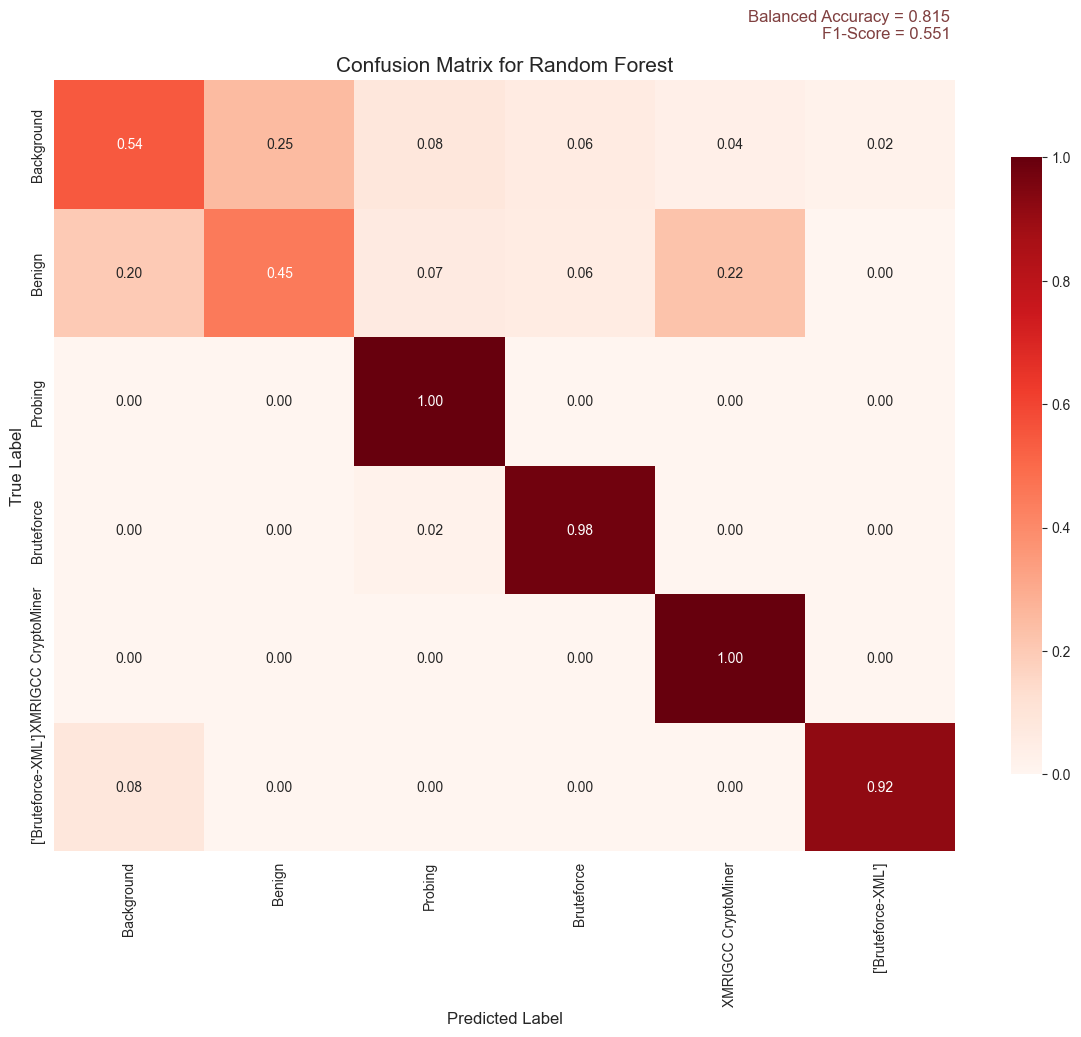

In [83]:
from sklearn.metrics import confusion_matrix, f1_score

best_model_name = max(optimal_balanced_accuracies, key=lambda name: optimal_balanced_accuracies[name][0])
optimal_acc, optimal_size = optimal_balanced_accuracies[best_model_name]

if optimal_size < 1.0:
    X_partial_train, _, y_partial_train, _ = train_test_split(X_train, y_train, train_size=optimal_size, random_state=42)
else:
    X_partial_train, y_partial_train = X_train, y_train

best_model = None
for name, model in zip(classifier_names, classifiers):
    if name == best_model_name:
        best_model = model
        best_model.fit(X_partial_train, y_partial_train)
        break

y_pred = best_model.predict(X_test)

cmat = confusion_matrix(y_test, y_pred, normalize='true')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 5: Display the confusion matrix
display_confusion_matrix(cmat, balanced_acc, f1, best_model_name)
